In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy import cosmology


import SAGA  
from SAGA import ObjectCuts as C

from SAGAbg.utils import calc_kcor
from SAGAbg import SAGA_get_spectra
import namer

import sys
sys.path.append('../scripts/')
import find_oiii4363

In [4]:
from astropy import units as u

import specutils
from specutils import analysis, spectra, manipulation

from specutils.spectra import Spectrum1D
from specutils.fitting import fit_lines

from astropy.modeling import models
from astropy.nddata import StdDevUncertainty

In [5]:
cosmo = cosmology.FlatLambdaCDM (70., 0.3)

In [6]:
clean = find_oiii4363.build_saga_catalog ()

SAGA `shared_dir` set to /Users/kadofong/DropBox/SAGA/
SAGA `local_dir`  set to ../local_data/


/Users/kadofong/opt/miniconda3/envs/vanilla/lib/python3.10/site-packages/astropy/cosmology/flrw/lambdacdm.py:347: RuntimeWarning: divide by zero encountered in true_divide
  self._T_hypergeometric(s / (z2 + 1.0)))
/Users/kadofong/opt/miniconda3/envs/vanilla/lib/python3.10/site-packages/astropy/cosmology/flrw/lambdacdm.py:369: RuntimeWarning: invalid value encountered in multiply
  return 2 * np.sqrt(x) * hyp2f1(1./6, 1./2, 7./6, -x**3)


In [7]:
first_objects = clean[(clean['selection']==3)&(clean['ZQUALITY']>=3)&((clean['TELNAME']=='AAT')|(clean['TELNAME']=='MMT'))]
all_the_good_spectra = clean[(clean['ZQUALITY']>=3)&((clean['TELNAME']=='AAT')|(clean['TELNAME']=='MMT'))]

In [8]:
obj = clean.loc['suckles_implements']

In [10]:
line_df = pd.read_csv('../local_data/scratch/line_df.csv', index_col=0)

In [11]:
detmask = line_df['OIII4363']/line_df['u_OIII4363'] > 1.
detmask &= line_df['OIII4363'] > 3.
detections = line_df.loc[detmask]
print(detections.shape[0])

2220


In [12]:
obj = clean.loc['upkeep_transposed']

In [17]:
g_init = models.Gaussian1D(amplitude=1., mean=3., stddev=1.*u.AA)

In [21]:
g_init.mean = 1.

AttributeError: can't set attribute 'flux'

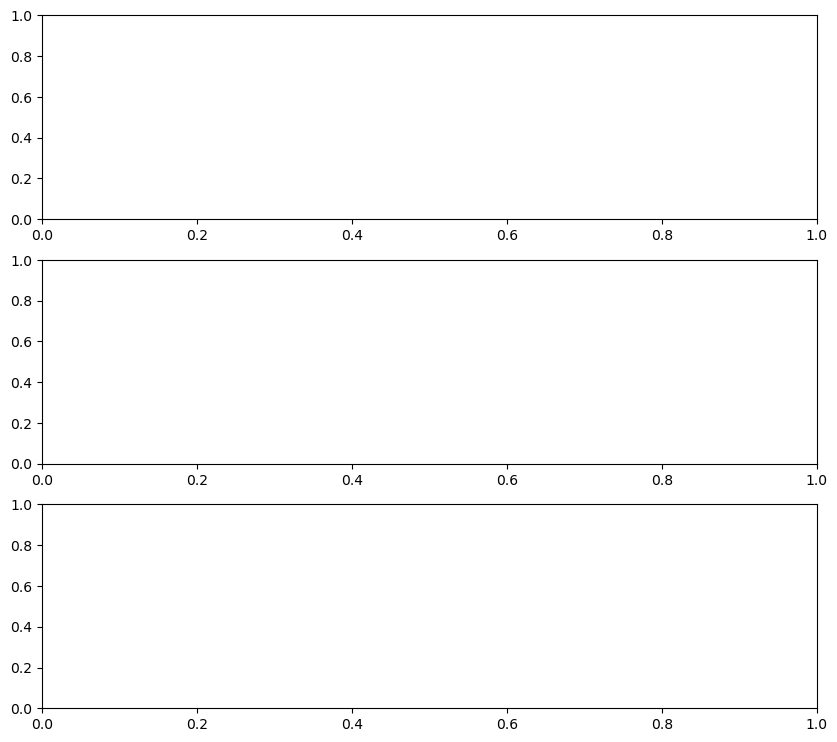

In [15]:
arr = find_oiii4363.fit_lines.singleton ( obj )

In [226]:
obj = all_the_good_spectra[0]

In [230]:
len(all_the_good_spectra)*7.74 / 3600

4.2021749999999995

CPU times: user 7.74 s, sys: 34.4 ms, total: 7.78 s
Wall time: 6.48 s


array([[3.91571578e+00, 1.67223485e+00, 2.35141557e-01, 4.36818233e+03,
        6.64342196e+00, 1.67223485e+00, 3.86072230e-01],
       [6.56404142e+00, 1.72875608e+00, 1.62388078e+00, 4.86148406e+03,
        1.61260215e+00, 1.72875608e+00, 4.15514946e-01],
       [3.31428705e+01, 1.58791021e+00, 7.05096327e+00, 6.56287163e+03,
        1.87521787e+00, 1.58791021e+00, 5.08263760e-01]])

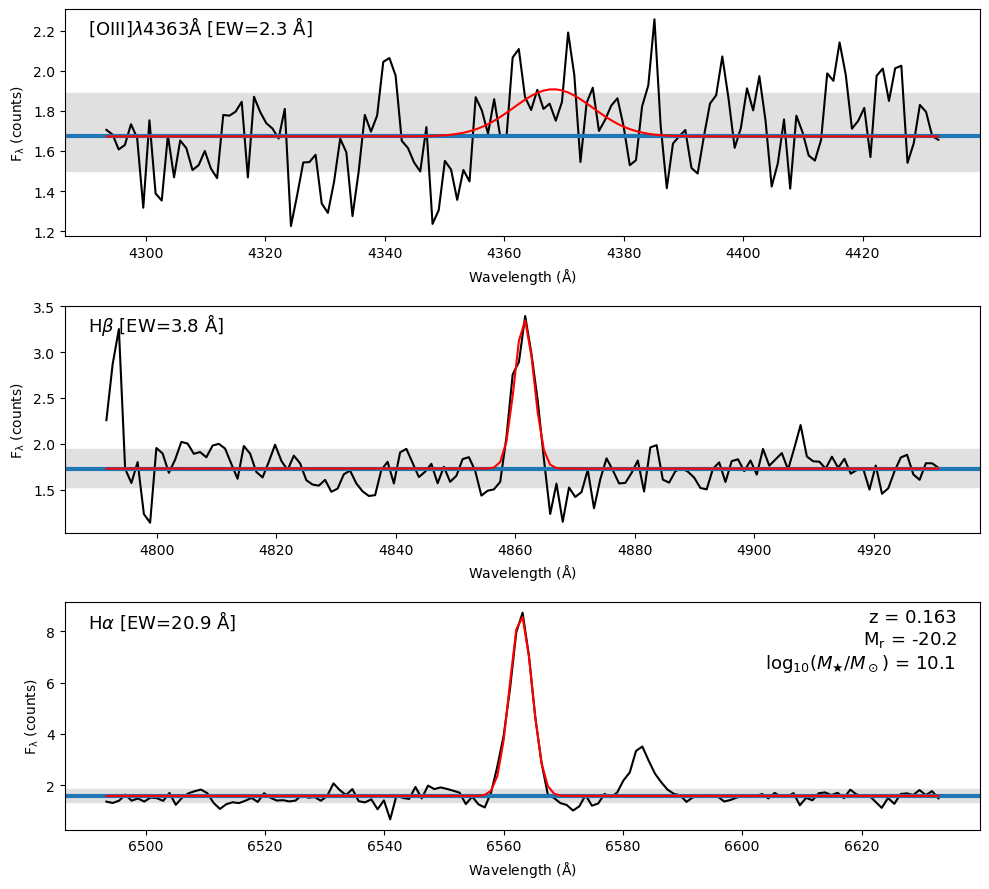

In [227]:
%%time
fit_lines.singleton(obj)

/Users/kadofong/work/surveys/saga/notebooks/../scripts/fit_lines.py:39: RuntimeWarning: invalid value encountered in sqrt
  uncertainty = StdDevUncertainty ( np.sqrt(flux) )


halitosis_whilst
cleansed_nationally
overstuffed_smiler
trilingual_impermissible
deist_medicinal
malty_supremo
solicitations_persuasively
elflike_physicist
hardwoods_encouragingly
distempered_resemble
limestone_politest
fidget_treated
saturates_yawningly
penalising_quickly
worriedly_slope
reinforcing_conceptual
coarseness_fastenings
trunnions_retrying
lighthouses_hilarity
lighthouse_whatsoever
strict_minor
encrypted_siding
firebrand_conceding
inventors_zonation
greasepaint_woven
snowflakes_lighting
bludgeoning_spandrels
prowlers_janitors
benelux_mitts
nitrogenous_cropping
chairing_photosynthetic
aquamarine_scarecrows
marrow_reveille
confrontational_locks
hopelessly_sensuous
axillary_knuckling
revolve_wastelands
outcry_try
holidaying_enchiladas
nationalise_connexions
reporting_reminiscence
multiprocessors_withdraws
pollution_mantled
charabanc_stereotype
insulant_weightier
saucier_devouring
award_quiescent
austerely_gynaecologists
sharp_crooks
infirm_revealed
corset_telepathy
harshly_pun

KeyboardInterrupt: 

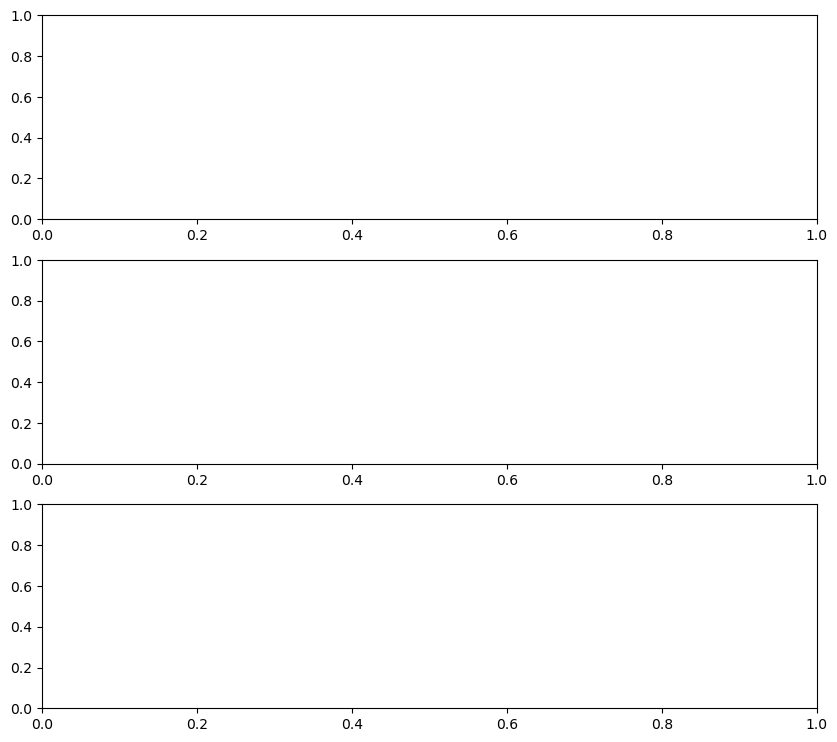

In [216]:
truedet = []
for wordid in detections.index:
    obj = clean.loc[wordid]
    arrpath = f'../figures/exploration/line_fits/fit_{obj["wordid"]}.txt'
    if os.path.exists(arrpath):
        continue
        
    arr = fit_lines.singleton ( obj )
    np.savetxt(arrpath, arr )
    plt.close ()
    
    if arr[0,1] > arr[0,6]:
        truedet.append(wordid)
        print(wordid)